### 1.문제 정의 

광고비용으로 매출 예측

지도학습 /회귀


### 2.데이터 수집


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("Advertising.csv",index_col=0)  
#  파일을 열어보니 0이 인덱스 숫자였다. 0번째 컬럼을 인덱스로 만들겠다. 

In [5]:
data.keys()

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


### 3.데이터 전처리

In [8]:
X= data.iloc[:,:3]
y=data.iloc[:,3]

In [9]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [10]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

### 4.eda

In [11]:
import seaborn as sns

C:\Users\pc-23\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


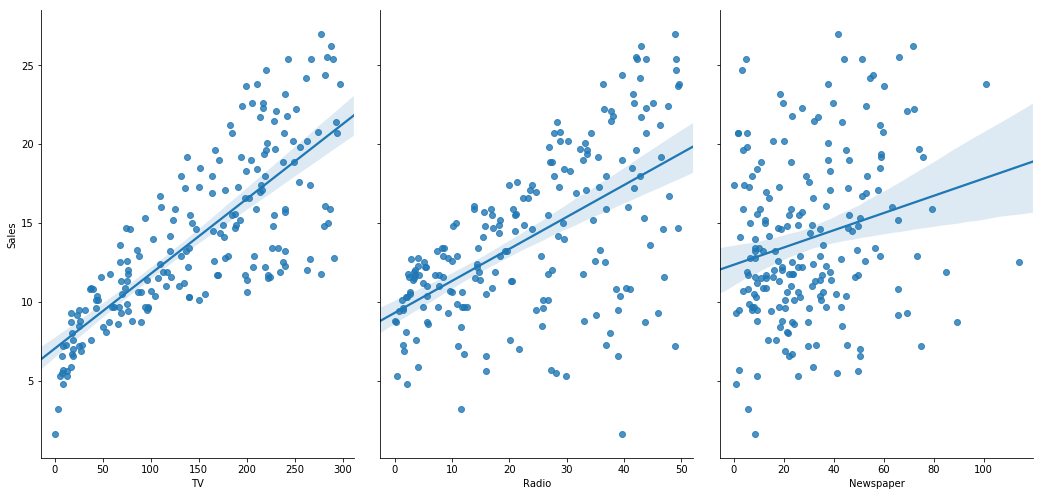

In [12]:
sns.pairplot(data=data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', kind='reg', height=7,aspect=0.7)

### 5.모델 선택, 학습, 평가

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.3)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# y= w1*x1+ w2*x2+w3*x3+b

In [17]:
lr= LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9224605706201435

In [18]:
print('가중치:{}'.format(lr.coef_))
print('절편:{}'.format(lr.intercept_))

가중치:[0.04695205 0.17658644 0.00185115]
절편:2.937215734690609


y= 0.047*x1+ 0.177*x2+0.002*x3+2.937

### -RMSE

In [19]:

from sklearn import metrics

In [20]:
y_pred= lr.predict(X_test)
np.sqrt((metrics.mean_squared_error(y_test,y_pred)))

1.388857410775697

### 신문 컬럼을 지워봅시다.

In [50]:
X = X.iloc[:,:2]
X.head()

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.3)


In [52]:
lr= LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9230321850256802

In [53]:
y_pred= lr.predict(X_test)
np.sqrt((metrics.mean_squared_error(y_test,y_pred)))

1.383728668840889

### 성능을 더 향상 시킬수 있는 방법???

#특성 공학
#규제 교차검증


In [54]:
for i in range(4):
    for j in range(i,4):
        X[X.columns[i]+'x'+X.columns[j]]=X[X.columns[i]]*X[X.columns[j]]

In [55]:
X.shape

(200, 12)

In [56]:
X.head()

,TV,Radio,TVxTV,TVxRadio,TVxTVxTV,TVxTVxRadio,RadioxRadio,RadioxTVxTV,RadioxTVxRadio,TVxTVxTVxTV,TVxTVxTVxRadio,TVxRadioxTVxRadio
1,230.1,37.8,52946.01,8697.78,1.218288e+07,2001359.178,1428.84,2001359.178,328776.084,2.803280e+09,4.605127e+08,7.565138e+07
2,44.5,39.3,1980.25,1748.85,8.812112e+04,77823.825,1544.49,77823.825,68729.805,3.921390e+06,3.463160e+06,3.058476e+06
3,17.2,45.9,295.84,789.48,5.088448e+03,13579.056,2106.81,13579.056,36237.132,8.752131e+04,2.335598e+05,6.232787e+05
4,151.5,41.3,22952.25,6256.95,3.477266e+06,947927.925,1705.69,947927.925,258412.035,5.268058e+08,1.436111e+08,3.914942e+07
5,180.8,10.8,32688.64,1952.64,5.910106e+06,353037.312,116.64,353037.312,21088.512,1.068547e+09,6.382915e+07,3.812803e+06


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.3)

In [58]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print("훈련데이터 점수:{}".format(lr.score(X_train,y_train)))
print("테스트데이터 점수:{}".format(lr.score(X_test,y_test)))

훈련데이터 점수:0.9917824622622138
테스트데이터 점수:0.9960321913348233


In [59]:
y_pred= lr.predict(X_test)
np.sqrt((metrics.mean_squared_error(y_test,y_pred)))

0.3141750703020624

In [61]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [62]:
from sklearn.model_selection import cross_val_score

In [66]:
for a in [0.001,0.01,0.1,1,10,100,1000]:
    lasso = Lasso(alpha=a, max_iter=1000000)
    score= cross_val_score(lasso, X_train,y_train, cv=5).mean()
    print('a:{},score:{}'.format(a,score))

a:0.001,score:0.9870163935958765
a:0.01,score:0.987078638515975
a:0.1,score:0.9873048782778261
a:1,score:0.9835721822927319
a:10,score:0.9777840346080433
a:100,score:0.9706704477441888
a:1000,score:0.9454233964628017


In [69]:
lasso=Lasso(alpha=0.1, max_iter=10000000)
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.9960819270875466

In [70]:
y_pred= lr.predict(X_test)
np.sqrt((metrics.mean_squared_error(y_test,y_pred)))

0.3141750703020624